# PURPOSE OF THIS NOTEBOOK:
Analyze and determine how much of a gap there is between Max and his second teammate since 2022. This will test my hypothesis that the issues that Checo were facing were a car issue and not an issue of his skill. 

In [32]:
import pandas as pd
import numpy as np
import fastf1
import fastf1.plotting
import matplotlib as mpl
import timedelta

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [33]:
# Setting consistant variables
year = 2025
wknd = 1
ses = 'Q'
VER = 'VER'
LAW = 'LAW'
HAD = 'HAD'
colormap = mpl.cm.turbo

In [34]:
# Doing a test run to plot 
session = fastf1.get_session(year, wknd, ses)
session.load()
weekend = session.event

MaxLap = session.laps.pick_drivers(VER).pick_fastest()
LawLap = session.laps.pick_drivers(LAW).pick_fastest()
HadLap = session.laps.pick_drivers(HAD).pick_fastest()

# Get the telemetry for max
VER_x = MaxLap.telemetry['X']
VER_y = MaxLap.telemetry['Y']
VER_color = MaxLap.telemetry['Speed']
VER_laptime = MaxLap.telemetry[-1:]
VER_td = timedelta.Timedelta(MaxLap['LapTime'])

# Get telemetry for liam
LAW_x = LawLap.telemetry['X']
LAW_y = LawLap.telemetry['Y']
LAW_color = LawLap.telemetry['Speed']
LAW_laptime = LawLap.telemetry[-1:]
LAW_td = timedelta.Timedelta(LawLap['LapTime'])

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


In [35]:
VER_points = np.array([VER_x, VER_y]).T.reshape(-1, 1, 2)
VER_segments = np.concatenate([VER_points[:-1], VER_points[1:]], axis=1)

LAW_points = np.array([LAW_x, LAW_y]).T.reshape(-1, 1, 2)
LAW_segments = np.concatenate([LAW_points[:-1], LAW_points[1:]], axis=1)

In [36]:
# Turn it into a function:
def plot_fastest_lap(segments, lap, color, weekend, driver, laptime):
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    plt.title(f'{driver} time: {laptime.total.minutes}:{laptime.total.seconds}',
                size=24, loc='right')
    plt.title(f'{weekend.name} {year} - {driver} - Throttle', size=24, loc='left')


    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
            color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm,
                        linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                    orientation="horizontal")


    # Show the plot
    plt.show()
    print(f"{driver} time: {laptime.total.minutes}:{laptime.total.seconds}")

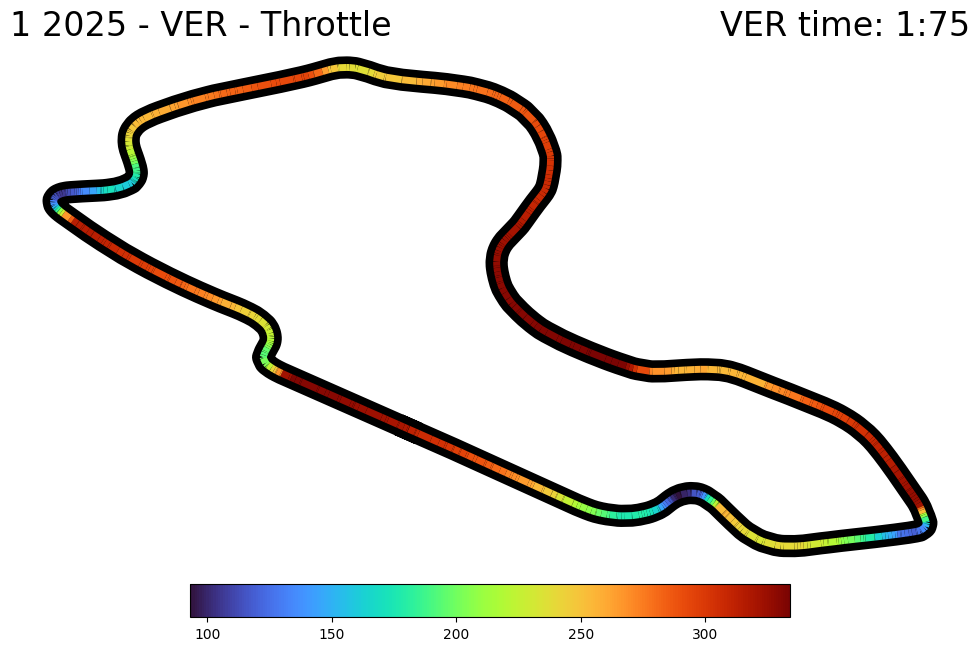

VER time: 1:75


In [37]:
# Plot Max's lap
plot_fastest_lap(VER_segments, MaxLap, VER_color, weekend, VER, VER_td)

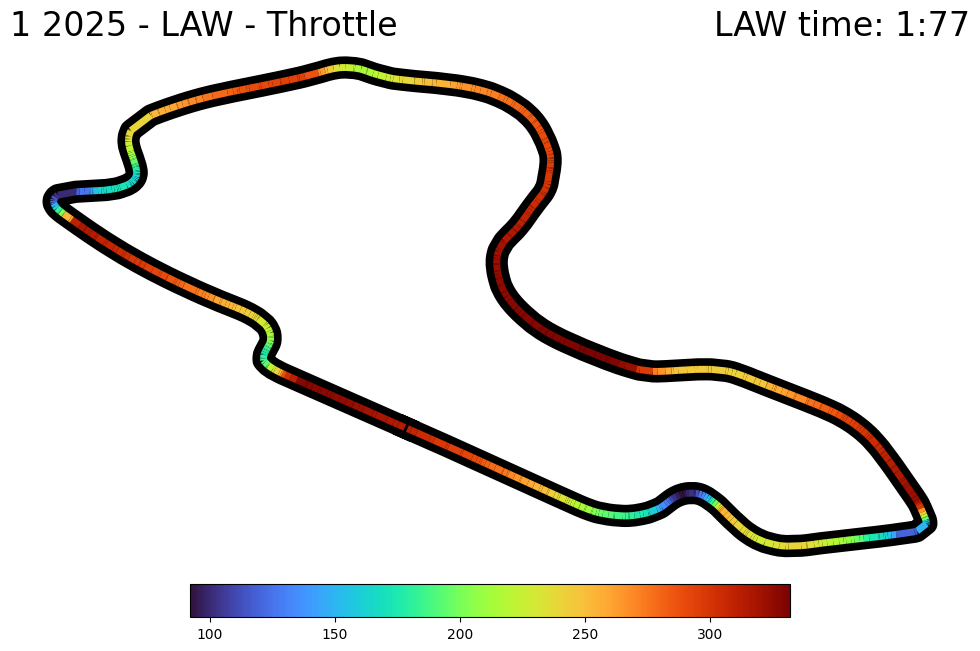

LAW time: 1:77


In [38]:
# now for lawson
plot_fastest_lap(LAW_segments, LawLap, LAW_color, weekend, LAW, LAW_td)


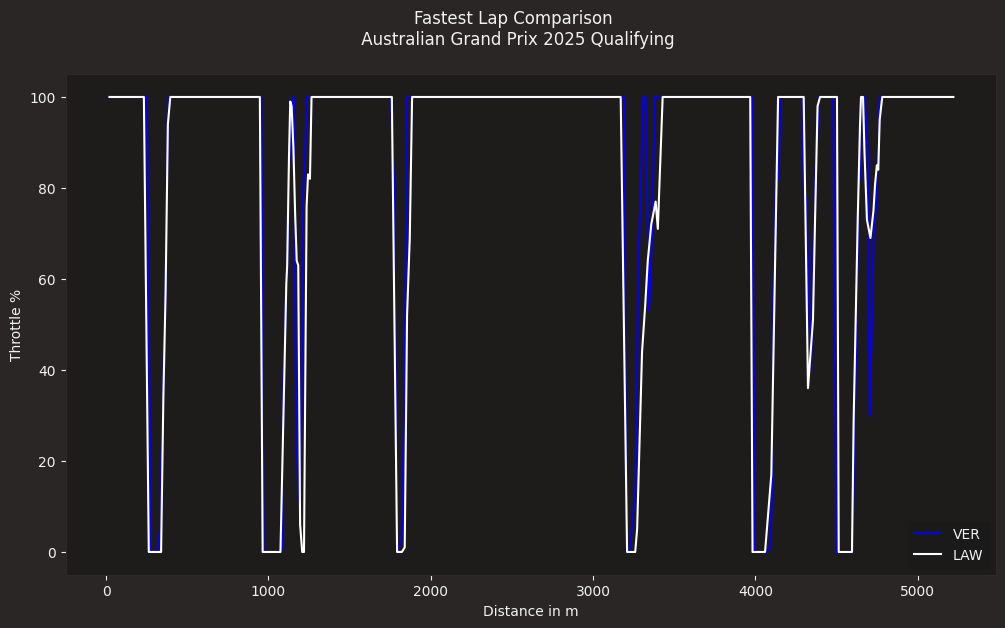

In [46]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

VER_tel = MaxLap.get_car_data().add_distance()
LAW_tel = LawLap.get_car_data().add_distance()

rbr_color = fastf1.plotting.get_team_color(MaxLap['Team'], session=session)
vcarb_color = fastf1.plotting.get_team_color(HadLap['Team'], session=session)

fig, ax = plt.subplots(figsize=(12,6.5))
ax.plot(VER_tel['Distance'], VER_tel['Throttle'], color=rbr_color, label=VER)
ax.plot(LAW_tel['Distance'], LAW_tel['Throttle'], color='white', label=LAW)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Throttle %')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

In [48]:
MaxLap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-03-15 05:58:21.775,0 days 01:10:50.176000,,655.638333,0 days 00:00:00,11284.425069,317.475002,8,100.0,False,12,interpolation,0.090161,0.000017,OnTrack,-1229.232981,-1301.544682,85.149377
3,2025-03-15 05:58:21.809,0 days 01:10:50.210000,,655.638333,0 days 00:00:00.034000,11302.700000,317.900000,8,100.0,False,12,pos,3.103532,0.000592,OnTrack,-1251.000000,-1281.000000,85.000000
4,2025-03-15 05:58:21.897,0 days 01:10:50.298000,,655.638333,0 days 00:00:00.122000,11350.000000,319.000000,8,100.0,False,12,car,10.908889,0.002082,OnTrack,-1307.303240,-1227.665995,84.314572
5,2025-03-15 05:58:22.029,0 days 01:10:50.430000,,655.638333,0 days 00:00:00.254000,11365.675000,319.825000,8,100.0,False,12,pos,22.636835,0.004320,OnTrack,-1392.000000,-1147.000000,83.000000
6,2025-03-15 05:58:22.057,0 days 01:10:50.458000,63,655.638333,0 days 00:00:00.282000,11369.000000,320.000000,8,100.0,False,12,car,25.131111,0.004796,OnTrack,-1410.077562,-1129.734885,82.792005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2025-03-15 05:59:36.577,0 days 01:12:04.978000,22,983.011111,0 days 00:01:14.802000,10931.000000,306.000000,8,100.0,False,12,car,5170.231944,0.986746,OnTrack,-844.861905,-1667.228936,87.114613
562,2025-03-15 05:59:36.828,0 days 01:12:05.229000,22,983.220278,0 days 00:01:15.053000,11002.306836,309.422728,8,100.0,False,12,pos,5191.921895,0.990886,OnTrack,-1057.000000,-1464.000000,85.000000
563,2025-03-15 05:59:37.017,0 days 01:12:05.418000,22,983.377778,0 days 00:01:15.242000,11056.000000,312.000000,8,100.0,False,12,car,5208.365278,0.994024,OnTrack,-1104.750522,-1419.314798,85.009065
564,2025-03-15 05:59:37.067,0 days 01:12:05.468000,22,983.377778,0 days 00:01:15.292000,11079.816213,312.278552,8,100.0,False,12,pos,5212.720192,0.994855,OnTrack,-1120.000000,-1405.000000,85.000000
